In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/extrovert-vs-introvert-behavior-data/personality_dataset.csv


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("/kaggle/input/extrovert-vs-introvert-behavior-data/personality_dataset.csv")

In [6]:
df.sample(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
1241,3.0,No,8.0,6.0,No,12.0,4.0,Extrovert
1436,11.0,Yes,1.0,2.0,Yes,4.0,0.0,Introvert
1414,8.0,Yes,1.0,1.0,Yes,1.0,0.0,Introvert
2177,1.0,No,8.0,5.0,No,NaN,9.0,Extrovert
2561,5.0,Yes,0.0,0.0,Yes,1.0,2.0,Introvert
1163,5.0,Yes,2.0,2.0,Yes,0.0,2.0,Introvert
1168,8.0,Yes,1.0,2.0,Yes,5.0,1.0,Introvert
2010,0.0,No,7.0,7.0,No,11.0,6.0,Introvert
364,0.0,No,4.0,5.0,No,6.0,3.0,Extrovert
816,7.0,Yes,0.0,1.0,Yes,0.0,0.0,Extrovert


In [7]:
df.shape

(2900, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [9]:
# because there are missing values need to deal with those!

In [10]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [11]:
df.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')

In [12]:
# because there are non numeric columns need to deal with those as well.

In [13]:
df['Stage_fear'] = df['Stage_fear'].map({'Yes': 1, 'No': 0})
df['Drained_after_socializing'] = df['Drained_after_socializing'].map({'Yes': 1, 'No': 0})


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


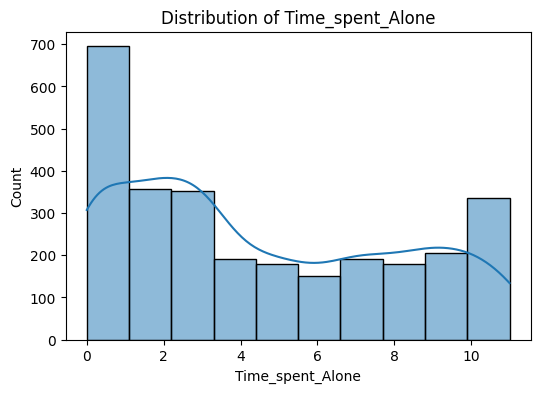

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


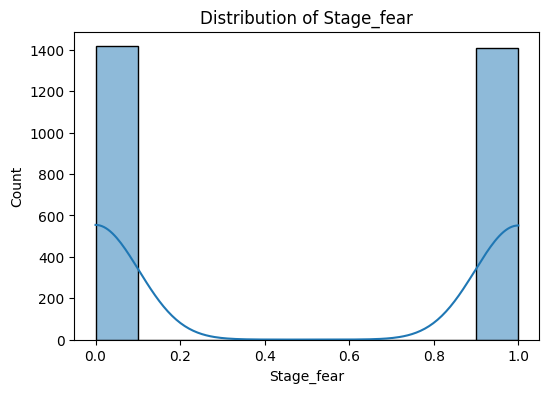

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


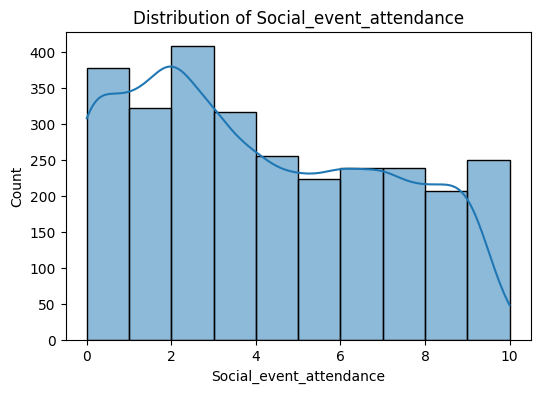

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


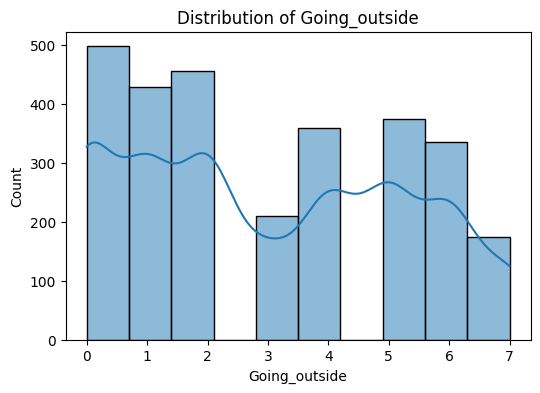

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


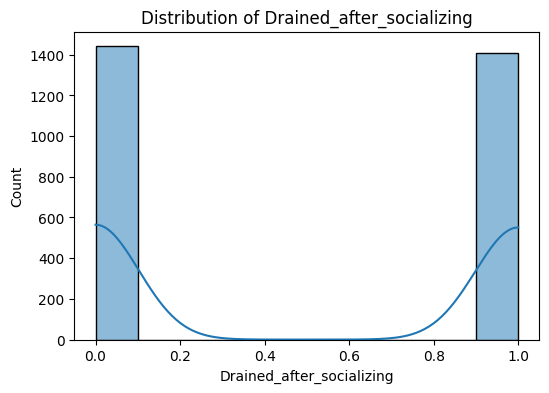

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


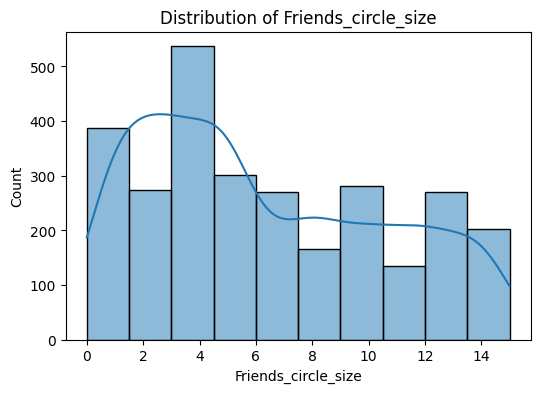

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


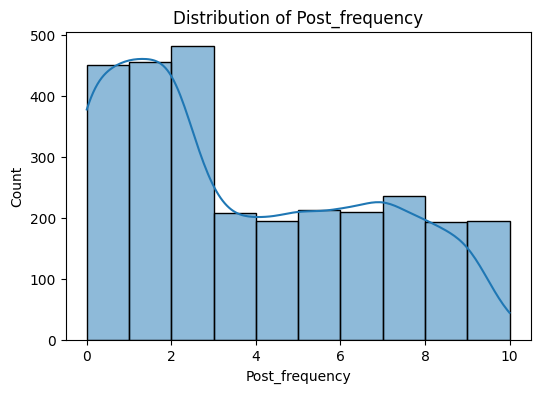

In [14]:
# Plot numerical columns
num_cols = ['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency']

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=10)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


Time_spent_Alone->Numerical col->Modal then uniform (right tail)->Mode or KNN/median if many modes

Stage_fear->Categorical (binary: Yes/No → 1/0)->~50% 0 and 1->Mode (since it's binary and balanced)

Social_event_attendance	Numerical->Uniform->Mean (uniform distribution justifies average)

Going_outside->Numerical->(Unclear from graph)->Check skew—if slight: mean; if strong: median

Drained_after_socializing->Categorical (binary)->~50% 0 and 1->Mode (safe for binary and nearly balanced)

Friends_circle_size->Numerical->Modal then skewed right-> Median (robust to right skew)

Post_frequency->Numerical-> Skewed left (sharp drop after 5)-> Median (better than mean for skewed data)

In [15]:
# For numerical columns with different strategies
df['Time_spent_Alone'].fillna(df['Time_spent_Alone'].mode()[0], inplace=True)
df['Social_event_attendance'].fillna(df['Social_event_attendance'].mean(), inplace=True)
df['Going_outside'].fillna(df['Going_outside'].median(), inplace=True)
df['Friends_circle_size'].fillna(df['Friends_circle_size'].median(), inplace=True)
df['Post_frequency'].fillna(df['Post_frequency'].median(), inplace=True)

# For categorical/binary columns
df['Stage_fear'].fillna(df['Stage_fear'].mode()[0], inplace=True)
df['Drained_after_socializing'].fillna(df['Drained_after_socializing'].mode()[0], inplace=True)

/tmp/ipykernel_35/2149320627.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Time_spent_Alone'].fillna(df['Time_spent_Alone'].mode()[0], inplace=True)
/tmp/ipykernel_35/2149320627.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   float64
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   float64
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(7), object(1)
memory usage: 181.4+ KB


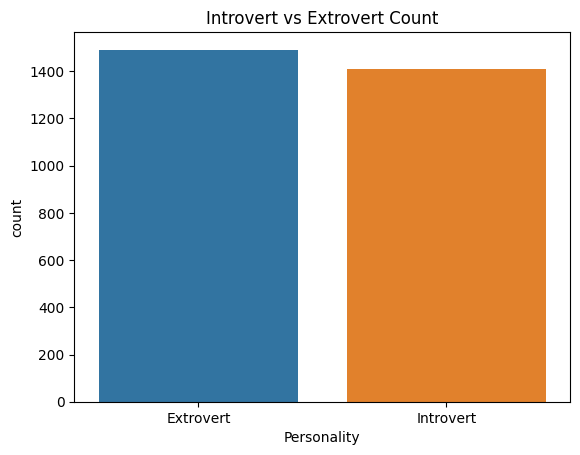

In [17]:
sns.countplot(data=df, x='Personality')
plt.title('Introvert vs Extrovert Count')
plt.show()


In [18]:
# creating a new feature to make life easy
df['Social_activity_score'] = df['Social_event_attendance'] + df['Post_frequency'] + df['Going_outside']


In [19]:
# scaling of the features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_cols = ['Time_spent_Alone', 'Friends_circle_size', 'Social_activity_score']
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])


In [20]:
df.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality', 'Social_activity_score'],
      dtype='object')

In [21]:
df.drop(['Social_event_attendance', 'Post_frequency', 'Going_outside'], axis=1)

,Time_spent_Alone,Stage_fear,Drained_after_socializing,Friends_circle_size,Personality,Social_activity_score
0,-0.116461,0.0,0.0,1.596787,Extrovert,0.617783
1,1.310998,1.0,1.0,-1.471766,Introvert,-1.035304
2,1.310998,1.0,1.0,-0.291553,Introvert,-0.759790
3,-1.258428,0.0,0.0,1.832829,Extrovert,1.444327
4,-0.401953,0.0,0.0,0.416574,Extrovert,1.031055
...,...,...,...,...,...,...
2895,-0.401953,0.0,0.0,-0.055511,Extrovert,1.168812
2896,-0.401953,0.0,0.0,1.832829,Extrovert,1.306570
2897,-0.116461,1.0,1.0,-0.527596,Introvert,-1.173062
2898,1.881981,1.0,1.0,-0.999681,Introvert,-0.897547


In [22]:
x=df.drop("Personality", axis=1)
y=df["Personality"]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
# Logistic regression

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)


In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# confusion_matrix(y_test, y_pred_lr)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

   Extrovert       0.93      0.92      0.93       302
   Introvert       0.91      0.93      0.92       278

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580



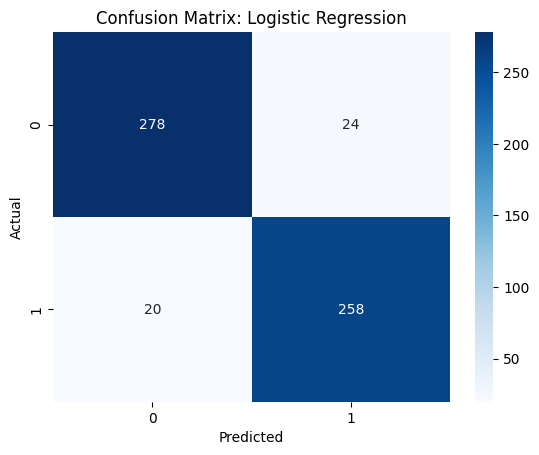

In [35]:
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [30]:
from sklearn.tree import DecisionTreeClassifier
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [47]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

   Extrovert       0.88      0.86      0.87       302
   Introvert       0.85      0.88      0.86       278

    accuracy                           0.87       580
   macro avg       0.87      0.87      0.87       580
weighted avg       0.87      0.87      0.87       580



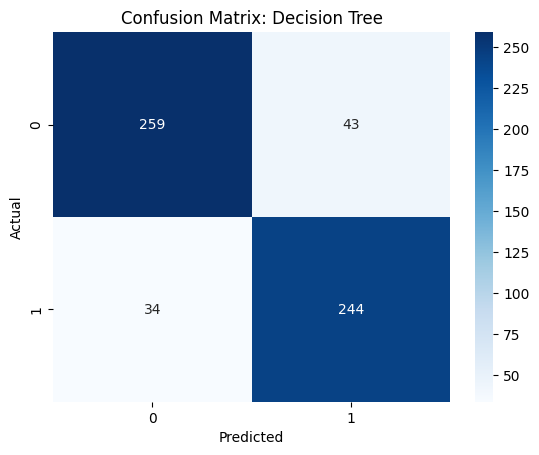

In [36]:
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [32]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [46]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

   Extrovert       0.94      0.91      0.92       302
   Introvert       0.91      0.93      0.92       278

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580



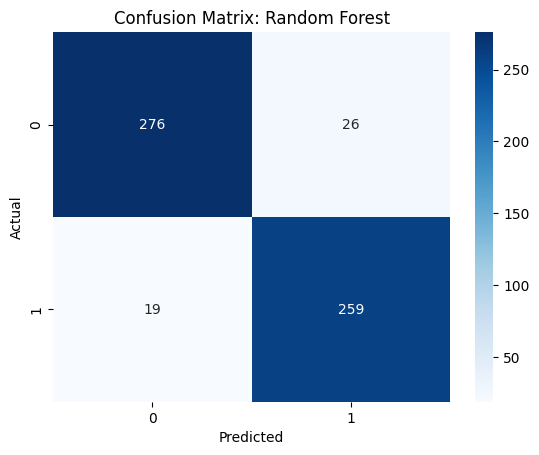

In [37]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [50]:
# Why Random Forest Might Not Have Worked As Well
# Despite its power, Random Forest doesn’t always outperform simpler models. Here's why Logistic Regression may have won here:

# Logistic Regression worked because:
# Reason	Explanation
# Data Linearity: If your data is linearly separable, Logistic Regression shines.
# Fewer Features	work well with a small/medium number of features, especially if features are meaningful.
# Less prone to overfitting, especially after regularization. It generalizes well.

# Random Forest didn’t work because:
# Reason	Explanation
# Overfitting risk: If trees were too deep or too many, RF might memorize noise.
# Not enough data/features: Works better with high-dimensional data or non-linear interactions.
# Bias in feature importance: Can overemphasize certain features, especially categorical ones.
# Parameter tuning needed	RF requires careful tuning (e.g., n_estimators, max_depth, min_samples_split) to avoid under/overfitting.

Logistic regression seems to perform better

In [39]:
from sklearn.model_selection import GridSearchCV
logreg = LogisticRegression(max_iter=1000)

In [40]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],              # Regularization strength
    'penalty': ['l1', 'l2'],                   # Regularization type
    'solver': ['liblinear', 'saga']            # Solvers that support both L1 and L2
}


In [41]:
grid = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [42]:
grid.best_params_

{'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}

In [45]:
best_logreg = grid.best_estimator_
y_pred_best = best_logreg.predict(X_test)
print(classification_report(y_test, y_pred_best))


              precision    recall  f1-score   support

   Extrovert       0.94      0.92      0.93       302
   Introvert       0.92      0.94      0.93       278

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580



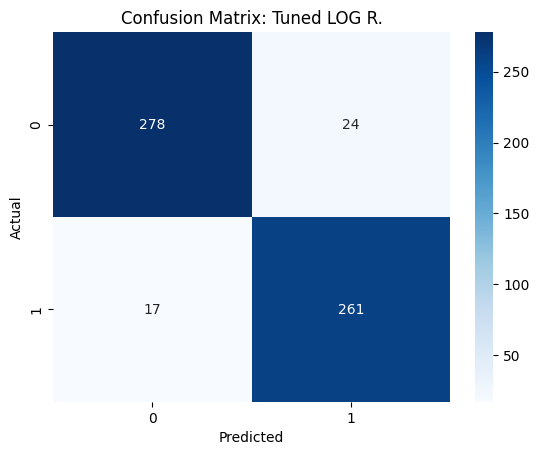

In [49]:
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Tuned LOG R.')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Why Some Metrics Decreased in the Tuned Logistic Regression
Despite tuning, a slight drop in accuracy occurred, even though recall and F1 score improved. Here’s why:

Tuning trade-offs:
Before tuning, the model might have been slightly biased towards the majority class, giving high accuracy by predicting more 0s.

After tuning, the model probably adjusted thresholds or regularization, aiming to better balance both classes (especially 1s).

So, what happened?

Metric	Explanation
Accuracy: Slight drop because FP (24 vs 16) increased.
Recall: Improved (261/278 vs 260/280) → Better at catching class 1s.
Precision: stayed almost the same.
F1 Score: Improved because recall improved more than precision dropped.

Bottom line: Tuning made the model better at recognizing class 1s (true positives), even if it made a few more mistakes on class 0s.